**Pair Programming - Beautiful Soup - Modulo 2 - Leccion 13 (6 nov 2025)**

https://books.adalab.es/materiales-data-analytics-full-time/modulo-2-extraer-informacion-de-la-web-y-bases-de-datos/lecciones/modulo-2-leccion-15-00-intro-bs/modulo-2-leccion-15-beautifulsoup

In [1]:
# antes de empezar importamos las librerías que vamos a usar. 
# Importar librerías para web scraping y manipulación de datos
# -----------------------------------------------------------------------
from bs4 import BeautifulSoup
import requests

# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importar librerías para procesamiento de texto
# -----------------------------------------------------------------------
import re

1. Realizará una solicitud HTTP GET a la siguiente url.

In [2]:
# definimos la url de la página de la vamos a sacar datos
url_coches = "https://www.ocasionplus.com/coches-segunda-mano?v2&orderBy=morePopular"

In [3]:
# hacemos la request a la página de la que queremos sacar la info
res_coches = requests.get(url_coches)

2.Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None. 

In [4]:
# vemos si todo ha ido bien | 200 = OK
print("La respuesta de la petición es:", res_coches.status_code)

La respuesta de la petición es: 200


In [5]:
# creamos el objeto BeautifulSoup para poder acceder al contenido solicitado
sopa_coches = BeautifulSoup(res_coches.content, 'html.parser')

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link as="image" href="/hera/icons/filters/car.svg" rel="preload"/><link as="image" href="/hera/icons/filters/motorbike.svg" rel="preload"/><link as="image" fetchpriority="high" href="https://img.ocasionplus.com/gmwErnLa_WXeAMvpNEa4OHcV-dE0Stoce_mdR2EXqnw/mobilex2wo/aHR0cHM6Ly9mb3Rvcy5lc3RhdGljb3NtZi5jb20vZm90b3NfYW51bmNpb3MvMDAvMDgvODQvODYvNDYvMC94MDEuanBnPzE0OTU0NzM3ODE0" rel="preload"/><link as="image" href="/icons/star-yellow.svg" rel="preload"/><link as="image" href="/icons/star-half-yellow.svg" rel="preload"/><link data-precedence="next" href="/hera/_next/static/css/767e5b9768cbde59.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/37be9721a70facd9.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/64e839d71e4cfc0b.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/c
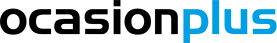

In [6]:
sopa_coches

In [24]:
# mostramos por pantalla los resultados del objeto de Beautiful Soup. El método ".prettify()" nos ayuda a visualizar los resultados de una forma más amigable
print(sopa_coches.prettify()[:500])

<!DOCTYPE html>
<html lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="image" href="/hera/icons/filters/car.svg" rel="preload"/>
  <link as="image" href="/hera/icons/filters/motorbike.svg" rel="preload"/>
  <link as="image" fetchpriority="high" href="https://img.ocasionplus.com/gmwErnLa_WXeAMvpNEa4OHcV-dE0Stoce_mdR2EXqnw/mobilex2wo/aHR0cHM6Ly9mb3Rvcy5lc3RhdGljb3NtZi5jb20vZm90b3NfYW51bmNpb3MvMDAvMDgvODQvODYvNDYvMC94MD


3. Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

In [10]:
sopa_coches.find_all("h2")

[<h2 class="resultHeading_h2__QqCZA">Tu coche de segunda mano y ocasión al mejor precio (12.465)</h2>,
 <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Citroën C3</span><span class="cardVehicle_finance__SG6JV" data-test="span-version">BlueHDi 100 S&amp;S Plus  (102 CV)</span></h2>,
 <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Mazda CX-30</span><span class="cardVehicle_finance__SG6JV" data-test="span-version">2.5 e-Skyactive G MHEV Prime-Line AT (140 CV)</span></h2>,
 <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">KIA Rio</span><span class="cardVehicle_finance__SG6JV" data-test="span-version">1.2 CVVT Drive (85 CV)</span></h2>,
 <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Audi Q3</span><span class="cardVehicle_finance__SG6JV" data-tes

In [11]:
sopa_coches.find_all("h2", class_="cardVehicle_column_text__EvQkB")

[<h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Citroën C3</span><span class="cardVehicle_finance__SG6JV" data-test="span-version">BlueHDi 100 S&amp;S Plus  (102 CV)</span></h2>,
 <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Mazda CX-30</span><span class="cardVehicle_finance__SG6JV" data-test="span-version">2.5 e-Skyactive G MHEV Prime-Line AT (140 CV)</span></h2>,
 <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">KIA Rio</span><span class="cardVehicle_finance__SG6JV" data-test="span-version">1.2 CVVT Drive (85 CV)</span></h2>,
 <h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Audi Q3</span><span class="cardVehicle_finance__SG6JV" data-test="span-version">2.0 TFSI quattro (180 CV) S tronic</span></h2>,
 <h2 class="cardVehicle_column_text__E

In [12]:
sopa_coches.find_all("h2", class_="cardVehicle_column_text__EvQkB")[0]

<h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Citroën C3</span><span class="cardVehicle_finance__SG6JV" data-test="span-version">BlueHDi 100 S&amp;S Plus  (102 CV)</span></h2>

In [ ]:
# Convertido en TEXT
sopa_coches.find_all("h2", class_="cardVehicle_column_text__EvQkB")[0].text

'Citroën C3BlueHDi 100 S&S Plus  (102 CV)'

In [14]:
type(sopa_coches.find_all("h2", class_="cardVehicle_column_text__EvQkB")[0].text)

str

In [ ]:
coches = []

for c in sopa_coches.find_all("h2", class_="cardVehicle_column_text__EvQkB"):
    coches.append(c.text)

In [16]:
coches

['Citroën C3BlueHDi 100 S&S Plus  (102 CV)',
 'Mazda CX-302.5 e-Skyactive G MHEV Prime-Line AT (140 CV)',
 'KIA Rio1.2 CVVT Drive (85 CV)',
 'Audi Q32.0 TFSI quattro (180 CV) S tronic',
 'Nissan JUKE1.6 Bose Personal Edition Black (112 CV)',
 'Peugeot 3008PureTech 130 S&S Allure Pack EAT8 (130 CV)',
 'Toyota Yaris1.5 120H Style Plus Auto (116 CV)',
 'Citroën BerlingoBlueHDi 100 S&S Talla M Shine (102 CV)',
 'Toyota Corolla200H Touring Sport Style Edition (196 CV)',
 'Lynk & Co 011.5 PHEV 6.6kW (261 CV)',
 'Fiat DucatoFurgón 35 Largo T.Sup Alto N.Power (136 CV)',
 'Opel Astra1.4 Turbo S&S Selective (125 CV)',
 'Ford Kuga1.5 EcoBoost S&S Trend 4x2 (150 CV)',
 'Peugeot 308SW SW PureTech 130 S&S Allure (130 CV)',
 'Peugeot 30081.6 BlueHDI FAP Style  (120 CV)',
 'Jeep Compass1.6 Multijet Limited 4x2 (120 CV)',
 'Opel Astra1.6 CDTi Selective (110 CV)',
 'Mercedes VitoMercedes-Benz Furgon 110CDI Base Larga (102 CV)',
 'Peugeot 3008BlueHDi 150 S&S Allure (150 CV)',
 'Peugeot ExpertFurgon BlueH

In [22]:
sopa_coches.find_all("span", class_="cardVehicle_column_amount__VgVU")

[]

In [25]:
type(sopa_coches.find_all("span", class_="cardVehicle_column_amount__VgVU"))

bs4.element.ResultSet

In [ ]:
## NO hemos llegado a terminar - El subira el resultado del Pair con OcasionPlus
# No hemos llegado a encontrar el 'span' adecuado, question de hacer mas find_all dentro de otro dentro de otro :S

In [ ]:
sopa.find_all("span", class_="cardVehicle_finance__SG6JV" data-test="span")

NameError: name 'sopa' is not defined

[<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link as="image" href="/hera/icons/filters/car.svg" rel="preload"/><link as="image" href="/hera/icons/filters/motorbike.svg" rel="preload"/><link as="image" fetchpriority="high" href="https://img.ocasionplus.com/gmwErnLa_WXeAMvpNEa4OHcV-dE0Stoce_mdR2EXqnw/mobilex2wo/aHR0cHM6Ly9mb3Rvcy5lc3RhdGljb3NtZi5jb20vZm90b3NfYW51bmNpb3MvMDAvMDgvODQvODYvNDYvMC94MDEuanBnPzE0OTU0NzM3ODE0" rel="preload"/><link as="image" href="/icons/star-yellow.svg" rel="preload"/><link as="image" href="/icons/star-half-yellow.svg" rel="preload"/><link data-precedence="next" href="/hera/_next/static/css/767e5b9768cbde59.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/37be9721a70facd9.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/64e839d71e4cfc0b.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/3464334fda57
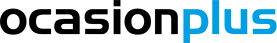
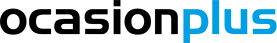
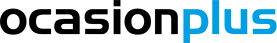
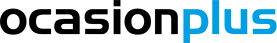
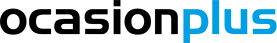
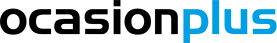
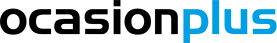
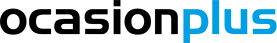
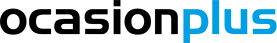
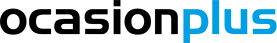

In [26]:
sopa_coches.find_all()

4. Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:

- "coche": Nombres de los coches.

- "precio_rebajado": Precios rebajados.

- "precio_original": Precios originales.

- "km": Kilómetros recorridos.

5. Retornará el DataFrame resultante.

6. Una vez extraída toda la información deberéis almacenar toda la información en un DataFrame. El DataFrame debe tener un aspecto parecido a este: